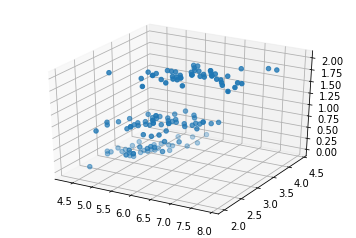

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.target)

plt.show()

In [11]:
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8)
print('{} train samples with {} dimensions'.format(X_train.shape[0], X_train.shape[1]))
print('{} test samples with {} dimensions'.format(X_test.shape[0], X_test.shape[1]))

120 train samples with 4 dimensions
30 test samples with 4 dimensions


C:\Users\USUARIO\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
#Escalar datos
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#PCA
pca=PCA(n_components=3)
pca.fit(X_train_scaled.data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
X_train_pca=pca.transform(X_train_scaled.data)
X_test_pca=pca.transform(X_test_scaled.data)

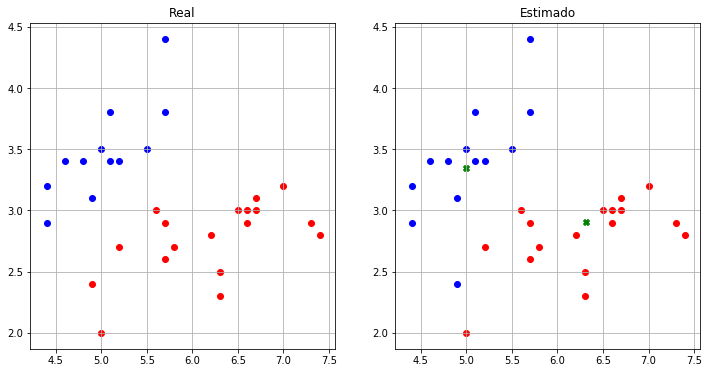

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

ypredict = kmeans.predict(X_test)

# plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x_pos, x_neg = X_test[y_test > 0], X_test[y_test <= 0]    
ax1.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax1.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b') 
ax1.grid()
ax1.set_title("Real")

x_pos, x_neg = X_test[ypredict > 0], X_test[ypredict <= 0]    
ax2.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax2.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')  
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='g')
ax2.grid()    
ax2.set_title("Estimado")

plt.show()

In [16]:
from sklearn.metrics import accuracy_score

# Accuracy de KMeans
accuracy_kmeans = accuracy_score(y_test, kmeans.predict(X_test))

print('Accuracy KMeans: {}'.format(accuracy_kmeans))

Accuracy KMeans: 0.8333333333333334


In [28]:
# Entrenamos KMeans
# Utilizando la transformación ortogonal realizada con PCA
kmeans = KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(X_train_pca)
# Accuracy de KMeans sobre el conjunto de entrenamiento
accuracy_kmeans = accuracy_score(y_train, kmeans.predict(X_train_pca))
print(accuracy_kmeans)

0.6166666666666667


In [29]:
print('Prediccion')
print(ypredict)

Prediccion
[1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0]


In [30]:
print('Real')
print(y_test)

Real
[2 1 1 0 1 0 1 1 0 0 1 1 2 0 1 2 1 0 0 0 1 1 1 0 0 1 0 1 2 0]
